# DATA ANALYSIS ON GLOBAL TRADE TRANSACTIONS

## IMPORT THE REQUIRED LIBRARIES

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## LOAD THE DATASET

In [35]:
df_trade_transaction_data = pd.read_excel('trade_transaction_data.xlsx')

## DATA OVERVIEW

In [37]:
df_trade_transaction_data.head()

,Transaction_ID,Trade_Type,HS_Code,Product_Name,Quantity,Trade_Value,Country_of_Origin,Country_of_Destination,Mode_of_Transport,Incoterms
0,29bd2b41-9f4d-47ed-92be-f1ab74aae09a,Export,680229,Grey Limestone,86,19123.10,Italy,Brazil,Rail,EXW
1,40c11233-b23e-48a5-95cb-8a732b2a369a,Import,680229,Black Granite,93,29066.12,Brazil,Italy,Air,FOB
2,6e159613-69c0-4783-aa4b-7eb6f97423a6,Import,680221,Grey Limestone,22,22843.19,Brazil,Brazil,Road,FOB
3,c6c5981a-f021-4078-a500-f6306dc2ccd1,Export,680221,Black Granite,96,25339.07,China,USA,Air,CIF
4,da2997a2-0890-44cf-8df8-26154ea4fb5e,Export,680229,Grey Limestone,62,27993.24,Spain,Italy,Road,CIF


In [38]:
df_trade_transaction_data.tail()

,Transaction_ID,Trade_Type,HS_Code,Product_Name,Quantity,Trade_Value,Country_of_Origin,Country_of_Destination,Mode_of_Transport,Incoterms
24995,da2b362e-7f79-4890-8f35-4455bb8b8bfc,Import,680223,Grey Limestone,42,2250.92,Brazil,Spain,Air,CIF
24996,43e76e0a-915b-49b9-a684-02a72adbd7c3,Export,680229,Grey Limestone,49,43819.24,Italy,Spain,Air,FOB
24997,adfb1511-cccf-4e90-8331-f30c3b52cef3,Export,680223,Black Granite,24,35343.13,China,USA,Sea,CIF
24998,0c58dd60-1e6f-413c-aa99-bb748bfdc768,Export,680223,Grey Limestone,82,23954.12,Turkey,USA,Rail,EXW
24999,39465f79-f084-4e22-aad2-6bab026ce2b0,Import,680229,Grey Limestone,87,48135.65,Turkey,India,Road,CIF


In [39]:
# Show the shape of the data 
df_trade_transaction_data.shape

(25000, 10)

## INTERPRETATION
 - We have 25000 Observations[rows]
 - We have 10 Attributes[columns]

In [41]:
df_trade_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Transaction_ID          25000 non-null  object 
 1   Trade_Type              25000 non-null  object 
 2   HS_Code                 25000 non-null  int64  
 3   Product_Name            25000 non-null  object 
 4   Quantity                25000 non-null  int64  
 5   Trade_Value             25000 non-null  float64
 6   Country_of_Origin       25000 non-null  object 
 7   Country_of_Destination  25000 non-null  object 
 8   Mode_of_Transport       25000 non-null  object 
 9   Incoterms               25000 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.9+ MB


## INTERPRETATION
 - We have a total of 3 numerical columns and 7 categorical columns.
 - Memory usage is 1.9+ MB that means we do not require extra resources.

In [371]:
# justify the basic statstics of the data
df_trade_transaction_data.describe()

,HS_Code,Quantity,Trade_Value
count,25000.000000,25000.00000,25000.000000
mean,680224.366880,50.05496,25331.192133
std,3.407748,28.93837,14137.638388
min,680221.000000,1.00000,1000.300000
25%,680221.000000,25.00000,13027.995000
50%,680223.000000,50.00000,25238.585000
75%,680229.000000,75.00000,37532.630000
max,680229.000000,100.00000,49999.170000


In [373]:
# justify the basic statstics of the data
df_trade_transaction_data.describe().T

,count,mean,std,min,25%,50%,75%,max
HS_Code,25000.0,680224.366880,3.407748,680221.0,680221.000,680223.000,680229.00,680229.00
Quantity,25000.0,50.054960,28.938370,1.0,25.000,50.000,75.00,100.00
Trade_Value,25000.0,25331.192133,14137.638388,1000.3,13027.995,25238.585,37532.63,49999.17


In [398]:
import pandas as pd
import numpy as np

# Define a function to replace outliers with the mean using the IQR method
def replace_outliers_with_mean(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate the mean of the column
    mean_value = df[column_name].mean()

    # Replace outliers with the mean value
    df[column_name] = np.where((df[column_name] < lower_bound) | (df[column_name] > upper_bound),
                               mean_value, df[column_name])

    return df

# Create a copy of the dataframe to avoid modifying the original data
cleaned_data = df_trade_transaction_data.copy()

# Replace outliers in the Trade_Value column with its mean
cleaned_data = replace_outliers_with_mean(cleaned_data, 'Trade_Value')

# Display the statistics after replacing outliers
cleaned_data.describe().T


,count,mean,std,min,25%,50%,75%,max
HS_Code,25000.0,680224.366880,3.407748,680221.0,680221.000,680223.000,680229.00,680229.00
Quantity,25000.0,50.054960,28.938370,1.0,25.000,50.000,75.00,100.00
Trade_Value,25000.0,25331.192133,14137.638388,1000.3,13027.995,25238.585,37532.63,49999.17


#### INTERPRETATION
 - There are no outliers in the HS_Code and Quantity columns.
 - In the Trade_Value column, the large difference between the mean (25331.19) and median (25238.58) suggests the presence of outliers.
 - To handle this, outliers were detected using the IQR method and replaced with the mean, ensuring a more balanced dataset for analysis.

## DATA PREPROCESSING

In [47]:
# Count of null records in the data
df_trade_transaction_data.isnull()

,Transaction_ID,Trade_Type,HS_Code,Product_Name,Quantity,Trade_Value,Country_of_Origin,Country_of_Destination,Mode_of_Transport,Incoterms
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
24995,False,False,False,False,False,False,False,False,False,False
24996,False,False,False,False,False,False,False,False,False,False
24997,False,False,False,False,False,False,False,False,False,False
24998,False,False,False,False,False,False,False,False,False,False


In [48]:
df_trade_transaction_data.isnull().sum()

Transaction_ID            0
Trade_Type                0
HS_Code                   0
Product_Name              0
Quantity                  0
Trade_Value               0
Country_of_Origin         0
Country_of_Destination    0
Mode_of_Transport         0
Incoterms                 0
dtype: int64

## INTERPRETATION
 - We do not have any null records in the data

# EXPLORATORY DATA ANALYSIS

## UNIVARIATE ANALYSIS

In [52]:
# Segregate the data based on the data type
# Numerical dataframe
df_num = df_trade_transaction_data.select_dtypes(include='number') 
# Categorical dataframe
df_cat = df_trade_transaction_data.select_dtypes(include='object')

In [53]:
# show the first five numerical data
df_num.head()

,HS_Code,Quantity,Trade_Value
0,680229,86,19123.10
1,680229,93,29066.12
2,680221,22,22843.19
3,680221,96,25339.07
4,680229,62,27993.24


In [54]:
# show the first five categorical data
df_cat.head()

,Transaction_ID,Trade_Type,Product_Name,Country_of_Origin,Country_of_Destination,Mode_of_Transport,Incoterms
0,29bd2b41-9f4d-47ed-92be-f1ab74aae09a,Export,Grey Limestone,Italy,Brazil,Rail,EXW
1,40c11233-b23e-48a5-95cb-8a732b2a369a,Import,Black Granite,Brazil,Italy,Air,FOB
2,6e159613-69c0-4783-aa4b-7eb6f97423a6,Import,Grey Limestone,Brazil,Brazil,Road,FOB
3,c6c5981a-f021-4078-a500-f6306dc2ccd1,Export,Black Granite,China,USA,Air,CIF
4,da2997a2-0890-44cf-8df8-26154ea4fb5e,Export,Grey Limestone,Spain,Italy,Road,CIF


## PERFORM UNIVARIATE ANALYSIS ON THE NUMERICAL DATA

In [56]:
# show the numerical columns
df_num.columns

Index(['HS_Code', 'Quantity', 'Trade_Value'], dtype='object')

### HS_Code

In [58]:
# show the minimum 
df_num.HS_Code.min()

680221

In [59]:
# show the maximum 
df_num.HS_Code.max()

680229

In [60]:
# show the Average
df_num.HS_Code.mean().round(2)

680224.37

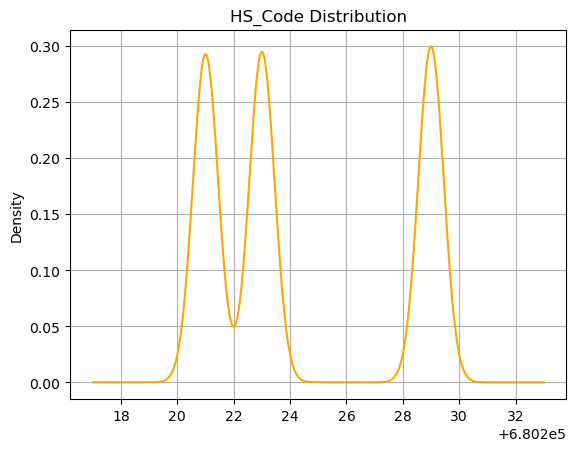

In [61]:
# show the distribution of the single numerical column
df_num.HS_Code.plot(kind='kde',color='orange')
plt.title('HS_Code Distribution')
plt.grid()
plt.show()

#### INTERPRETATION
 - The minimum HS Code for the product being traded is 680221
 - The maximum HS Code for the product being traded is 680229
 - The average HS Code for the product being traded is 680224.37
 - The data follows Multimodal Distribution
 - The data is mostly distributed in 3 groups, which are 20 to 22, 22 to 24 and 28 to 30

In [63]:
# show the numerical columns
df_num.columns

Index(['HS_Code', 'Quantity', 'Trade_Value'], dtype='object')

### QUANTITY

In [65]:
# show the minimum 
df_num.Quantity.min()

1

In [66]:
# show the maximum 
df_num.Quantity.max()

100

In [67]:
# show the Average
df_num.Quantity.mean().round(2)

50.05

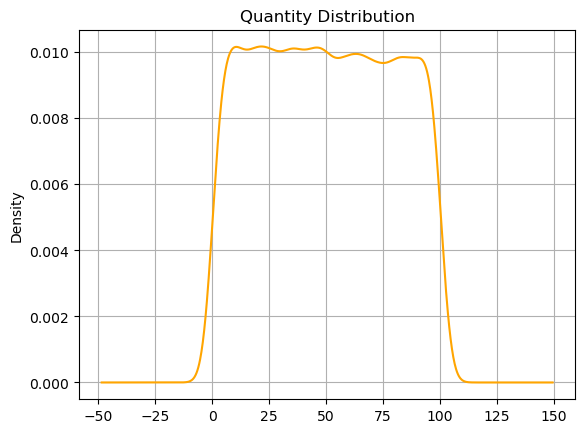

In [68]:
# show the distribution of the single numerical column
df_num.Quantity.plot(kind='kde',color='orange')
plt.title('Quantity Distribution')
plt.grid()
plt.show()

#### INTERPRETATION
 - The minimum Quantity for the product being traded is 1
 - The maximum Quantity for the product being traded is 100
 - The average Qunatity for the product being traded is 50.05
 - The Quantity mostly range between 0 and 125
 - The Quantity increases quickly around 0, stays fairly steady up to 125, and then drops sharply.

In [70]:
# show the numerical columns
df_num.columns

Index(['HS_Code', 'Quantity', 'Trade_Value'], dtype='object')

### TRADE VALUE

In [72]:
# show the minimum 
df_num.Trade_Value.min()

1000.3

In [73]:
# show the maximum 
df_num.Trade_Value.max()

49999.17

In [74]:
# show the Average
df_num.Trade_Value.mean().round(2)

25331.19

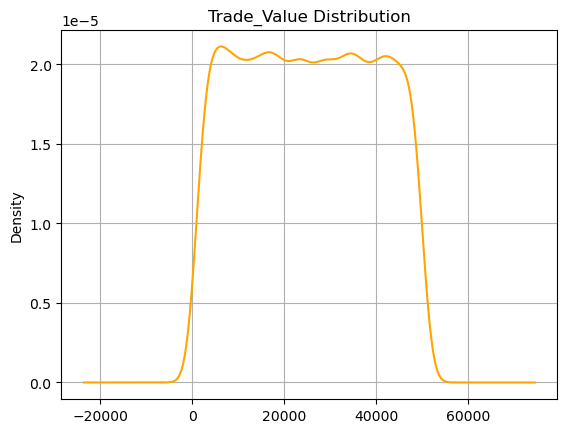

In [75]:
# show the distribution of the single numerical column
df_num.Trade_Value.plot(kind='kde',color='orange')
plt.title('Trade_Value Distribution')
plt.grid()
plt.show()

#### INTERPRETATION
 - The minimum Trade Value for the product being traded is 1000.3
 - The maximum Trade Value Quantity for the product being traded is 49999.17
 - The average Trade Value Qunatity for the product being traded is 25331.19
 - The Trade Values mostly range between 0 and 60000
 - The number of trades increases quickly around 0, stays fairly steady up to 60000, and then drops sharply.

## PERFORM UNIVARIATE ANALYSIS ON THE CATEGORICAL DATA

In [78]:
# show the categorical columns
df_cat.columns

Index(['Transaction_ID', 'Trade_Type', 'Product_Name', 'Country_of_Origin',
       'Country_of_Destination', 'Mode_of_Transport', 'Incoterms'],
      dtype='object')

### TRANSACTION ID

In [80]:
# show the count
df_cat.Transaction_ID.value_counts()

Transaction_ID
29bd2b41-9f4d-47ed-92be-f1ab74aae09a    1
5766a5d0-0820-4a23-a87b-5dbc47117efe    1
831dcb29-af61-4e39-a76c-9e7c9f68d6b2    1
c8ea4256-3795-49d6-b58c-5b3177bc0c4e    1
8e288423-253f-4ba8-9b35-230f2f0408a6    1
                                       ..
2aa13ad8-d90b-4065-a16f-11eb9cd34bce    1
4dc5799d-b222-4ba4-a7df-7e4f6ab6ddc5    1
f1738cc5-c027-4811-9b3e-41c8caf95379    1
e63eb4e0-5dee-49f2-aa5a-979d402e42d6    1
39465f79-f084-4e22-aad2-6bab026ce2b0    1
Name: count, Length: 25000, dtype: int64

#### INTERPRETATION
 - The values for Transaction_ID are unique in each row, so we do not plot a graph.

In [82]:
# show the categorical columns
df_cat.columns

Index(['Transaction_ID', 'Trade_Type', 'Product_Name', 'Country_of_Origin',
       'Country_of_Destination', 'Mode_of_Transport', 'Incoterms'],
      dtype='object')

### TRADE TYPE

In [84]:
# show the count
df_cat.Trade_Type.value_counts()

Trade_Type
Export    12725
Import    12275
Name: count, dtype: int64

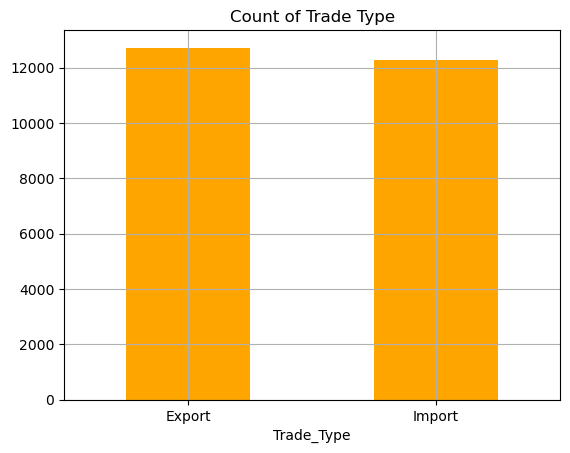

In [326]:
# show the plot
df_cat.Trade_Type.value_counts().plot(kind='bar',color='orange')
plt.title('Count of Trade Type') 
plt.xticks(rotation = 0)
plt.grid()
plt.show()

#### INTERPRETATION
 - Count of Export - 12725
 - Count of Import - 12275

In [87]:
# show the categorical columns
df_cat.columns

Index(['Transaction_ID', 'Trade_Type', 'Product_Name', 'Country_of_Origin',
       'Country_of_Destination', 'Mode_of_Transport', 'Incoterms'],
      dtype='object')

### PRODUCT NAME

In [89]:
# show the count
df_cat.Product_Name.value_counts()

Product_Name
White Marble      8423
Grey Limestone    8357
Black Granite     8220
Name: count, dtype: int64

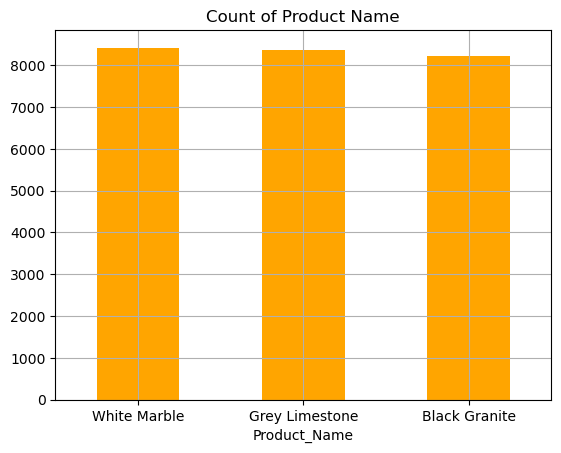

In [332]:
# show the plot
df_cat.Product_Name.value_counts().plot(kind='bar',color='orange')
plt.title('Count of Product Name') 
plt.xticks(rotation = 0)
plt.grid()
plt.show()

#### INTERPRETATION
 - Count of White Marble - 8423
 - Count of Grey Limestone - 8357
 - Count of Black Granite - 8220

In [92]:
# show the categorical columns
df_cat.columns

Index(['Transaction_ID', 'Trade_Type', 'Product_Name', 'Country_of_Origin',
       'Country_of_Destination', 'Mode_of_Transport', 'Incoterms'],
      dtype='object')

### COUNTRY OF ORIGIN

In [94]:
# show the count
df_cat.Country_of_Origin.value_counts()

Country_of_Origin
China     3643
Spain     3629
Turkey    3606
Italy     3548
Brazil    3544
USA       3533
India     3497
Name: count, dtype: int64

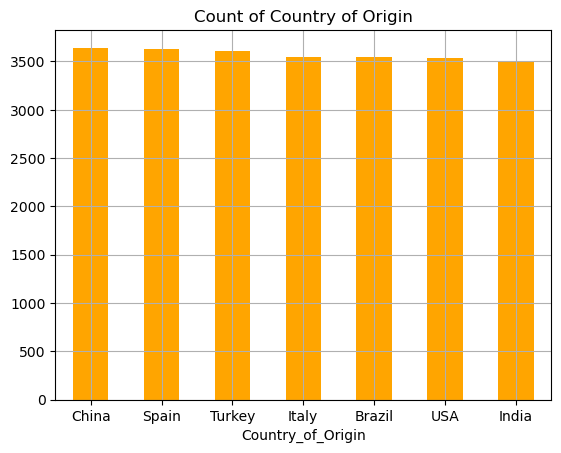

In [334]:
# show the plot
df_cat.Country_of_Origin.value_counts().plot(kind='bar',color='orange')
plt.title('Count of Country of Origin') 
plt.xticks(rotation = 0)
plt.grid()
plt.show()

#### INTERPRETATION
Products having country of origin
 - China are 3643
 - Spain are 3629
 - Turkey are 3606
 - Italy are 3548
 - Brazil are 3544
 - USA are 3533
 - India are 3497

In [97]:
# show the categorical columns
df_cat.columns

Index(['Transaction_ID', 'Trade_Type', 'Product_Name', 'Country_of_Origin',
       'Country_of_Destination', 'Mode_of_Transport', 'Incoterms'],
      dtype='object')

### COUNTRY OF DESTINATION

In [99]:
# show the count
df_cat.Country_of_Destination.value_counts()

Country_of_Destination
USA       3682
China     3658
Brazil    3549
Italy     3549
Spain     3531
Turkey    3524
India     3507
Name: count, dtype: int64

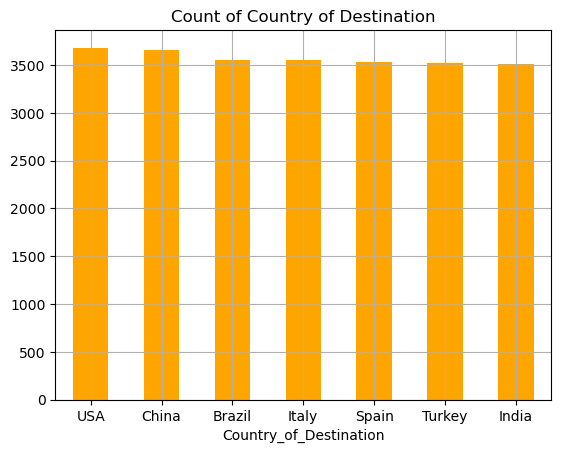

In [336]:
# show the plot
df_cat.Country_of_Destination.value_counts().plot(kind='bar',color='orange')
plt.title('Count of Country of Destination') 
plt.xticks(rotation = 0)
plt.grid()
plt.show()

#### INTERPRETATION
Products having Country of Destination
 - USA are 3682
 - China are 3658
 - Brazil are 3549
 - Italy are 3549
 - Spain are 3531
 - Turkey are 3524
 - India are 3507

In [102]:
# show the categorical columns
df_cat.columns

Index(['Transaction_ID', 'Trade_Type', 'Product_Name', 'Country_of_Origin',
       'Country_of_Destination', 'Mode_of_Transport', 'Incoterms'],
      dtype='object')

### MODE OF TRANSPORT

In [104]:
# show the count
df_cat.Mode_of_Transport.value_counts()

Mode_of_Transport
Sea     6258
Rail    6256
Air     6247
Road    6239
Name: count, dtype: int64

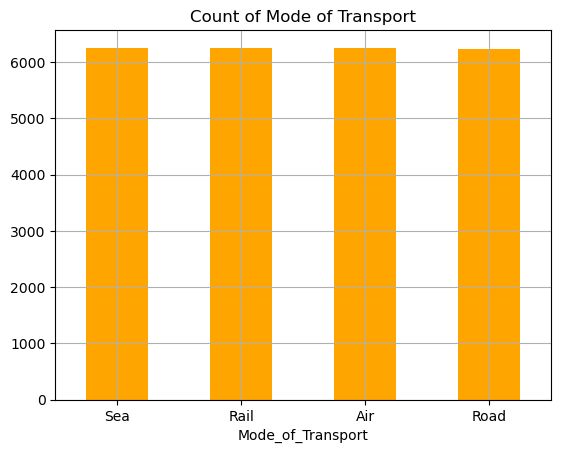

In [338]:
# show the plot
df_cat.Mode_of_Transport.value_counts().plot(kind='bar',color='orange')
plt.title('Count of Mode of Transport')
plt.xticks(rotation = 0)
plt.grid()
plt.show()

#### INTERPRETATION
 - Count of products transported Sea Ways is 6258
 - Count of products transported Rail Ways is 6256
 - Count of products transported Air Ways is 6247
 - Count of products transported Road Ways is 6239

In [107]:
# show the categorical columns
df_cat.columns

Index(['Transaction_ID', 'Trade_Type', 'Product_Name', 'Country_of_Origin',
       'Country_of_Destination', 'Mode_of_Transport', 'Incoterms'],
      dtype='object')

### INCOTERMS

In [109]:
# show the count
df_cat.Incoterms.value_counts()

Incoterms
FOB    8374
CIF    8317
EXW    8309
Name: count, dtype: int64

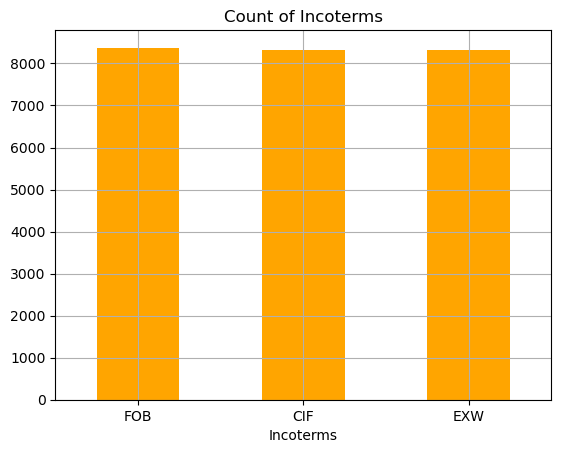

In [340]:
# show the plot
df_cat.Incoterms.value_counts().plot(kind='bar',color='orange')
plt.title('Count of Incoterms')
plt.xticks(rotation = 0)
plt.grid()
plt.show()

#### INTERPRETATION
 - Count of Incoterms of FOB is 8374
 - Count of Incoterms of CIF is 8317
 - Count of Incoterms of EXW is 8309

## BIVARIATE ANALYSIS

In [113]:
# show the first 5 observations of the main data
df_trade_transaction_data.head()

,Transaction_ID,Trade_Type,HS_Code,Product_Name,Quantity,Trade_Value,Country_of_Origin,Country_of_Destination,Mode_of_Transport,Incoterms
0,29bd2b41-9f4d-47ed-92be-f1ab74aae09a,Export,680229,Grey Limestone,86,19123.10,Italy,Brazil,Rail,EXW
1,40c11233-b23e-48a5-95cb-8a732b2a369a,Import,680229,Black Granite,93,29066.12,Brazil,Italy,Air,FOB
2,6e159613-69c0-4783-aa4b-7eb6f97423a6,Import,680221,Grey Limestone,22,22843.19,Brazil,Brazil,Road,FOB
3,c6c5981a-f021-4078-a500-f6306dc2ccd1,Export,680221,Black Granite,96,25339.07,China,USA,Air,CIF
4,da2997a2-0890-44cf-8df8-26154ea4fb5e,Export,680229,Grey Limestone,62,27993.24,Spain,Italy,Road,CIF


In [114]:
# correlation matrix of the numerical data
df_num.corr()

,HS_Code,Quantity,Trade_Value
HS_Code,1.000000,0.006428,0.002644
Quantity,0.006428,1.000000,0.000904
Trade_Value,0.002644,0.000904,1.000000


#### INTERPRETATION
 - We do not have any correlated numerical columns

## BIVARIATE ANALYSIS ON 1 NUMERICAL AND 1 CATEGORICAL COLUMN

In [117]:
# show the categorical columns
df_cat.columns

Index(['Transaction_ID', 'Trade_Type', 'Product_Name', 'Country_of_Origin',
       'Country_of_Destination', 'Mode_of_Transport', 'Incoterms'],
      dtype='object')

In [118]:
# show the numerical columns
df_num.columns

Index(['HS_Code', 'Quantity', 'Trade_Value'], dtype='object')

### Transaction_ID, HS_Code

#### INTERPRETATION
 - The values for Transaction_ID are unique in each row, so we do not plot a graph.

### Trade_Type, HS_Code

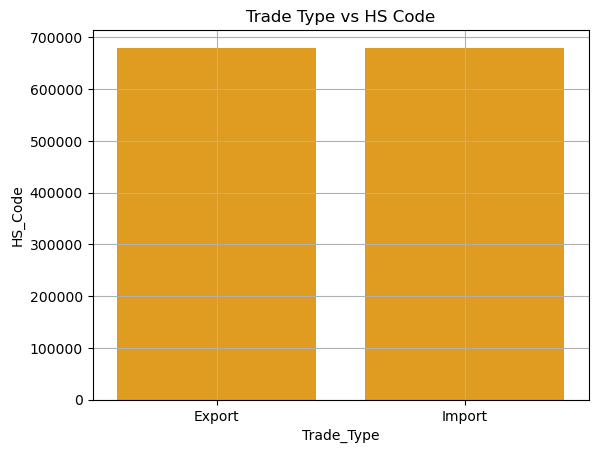

In [353]:
# plot the bar graph
sns.barplot(x='Trade_Type',y='HS_Code',data = df_trade_transaction_data,color='orange')
plt.title('Trade Type vs HS Code')
plt.grid()
plt.show()

<Axes: xlabel='Trade_Type', ylabel='HS_Code'>

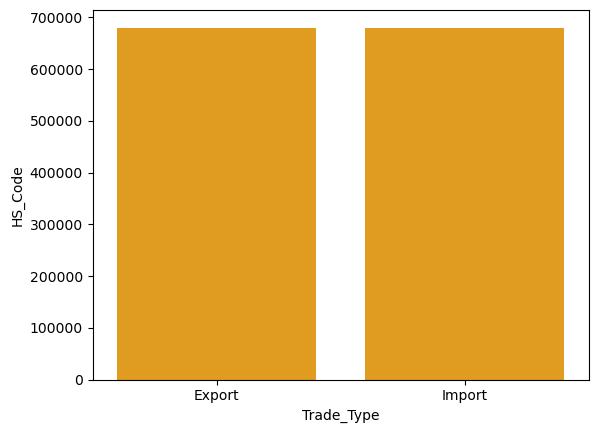

In [123]:
# plot the min bar graph
sns.barplot(x='Trade_Type',y='HS_Code',data = df_trade_transaction_data,color='orange',estimator=min)

<Axes: xlabel='Trade_Type', ylabel='HS_Code'>

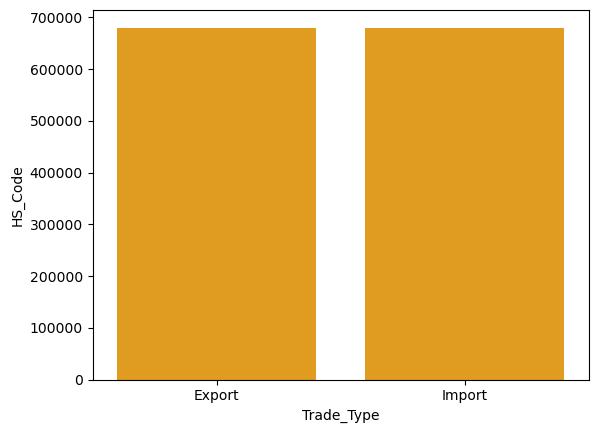

In [124]:
# plot the max bar graph
sns.barplot(x='Trade_Type',y='HS_Code',data = df_trade_transaction_data,color='orange',estimator=max)

#### INTERPRETATION
 - The distribution of HS Codes across Import and Export is fairly balanced.

### Product_Name, HS_Code

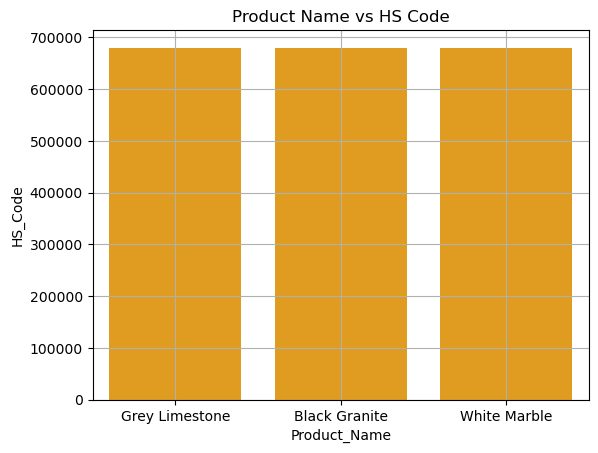

In [127]:
# plot the bar graph
sns.barplot(x='Product_Name',y='HS_Code',data = df_trade_transaction_data,color='orange')
plt.title('Product Name vs HS Code')
plt.grid()
plt.show()

<Axes: xlabel='Product_Name', ylabel='HS_Code'>

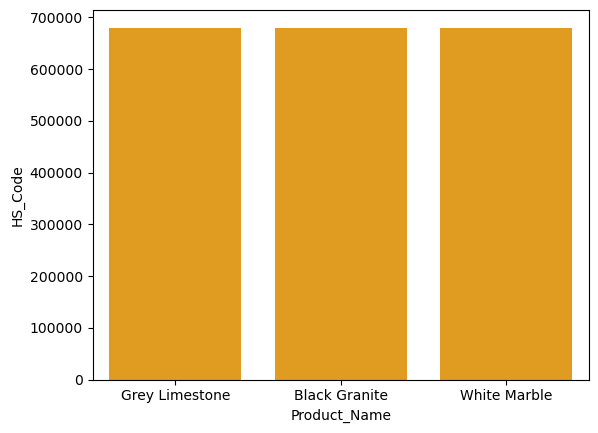

In [128]:
# plot the min bar graph
sns.barplot(x='Product_Name',y='HS_Code',data = df_trade_transaction_data,color='orange',estimator=min)

<Axes: xlabel='Product_Name', ylabel='HS_Code'>

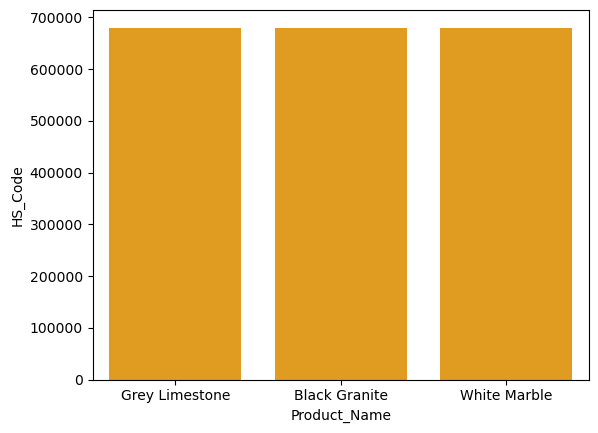

In [129]:
# plot the max bar graph
sns.barplot(x='Product_Name',y='HS_Code',data = df_trade_transaction_data,color='orange',estimator=max)

#### INTERPRETATION
 - Each product category is mapped to specific HS Codes.

### Country_of_Origin, HS_Code

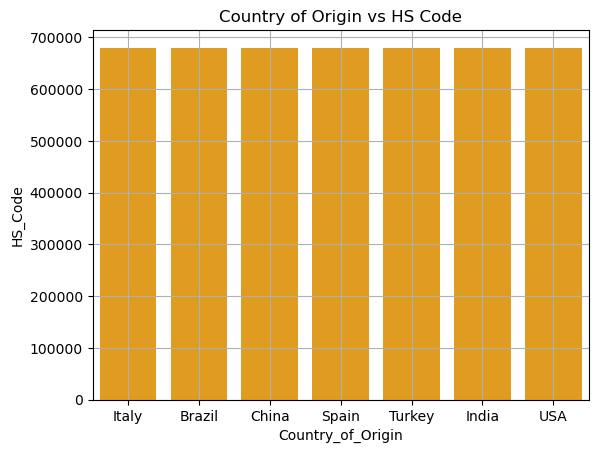

In [132]:
# plot the bar graph
sns.barplot(x='Country_of_Origin',y='HS_Code',data = df_trade_transaction_data,color='orange')
plt.title('Country of Origin vs HS Code')
plt.grid()
plt.show()

<Axes: xlabel='Country_of_Origin', ylabel='HS_Code'>

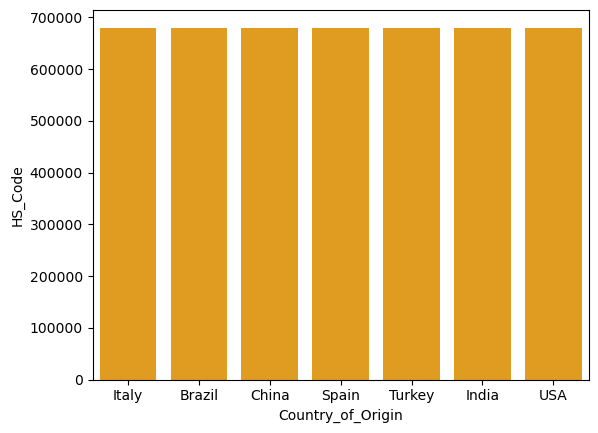

In [133]:
# plot the min bar graph
sns.barplot(x='Country_of_Origin',y='HS_Code',data = df_trade_transaction_data,color='orange',estimator=min)

<Axes: xlabel='Country_of_Origin', ylabel='HS_Code'>

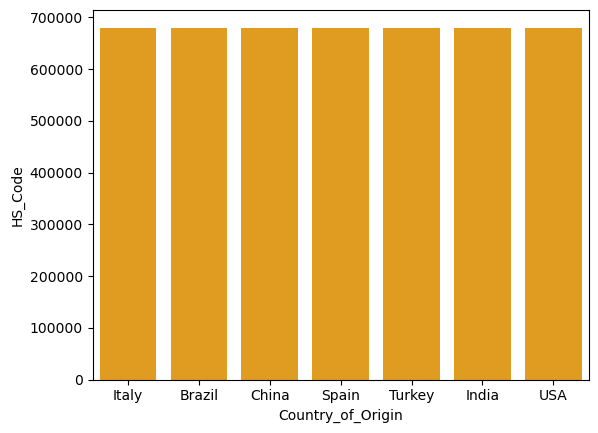

In [134]:
# plot the max bar graph
sns.barplot(x='Country_of_Origin',y='HS_Code',data = df_trade_transaction_data,color='orange',estimator=max)

#### INTERPRETATION
 - Certain countries trade specific HS Codes

### Country_of_Destination, HS_Code

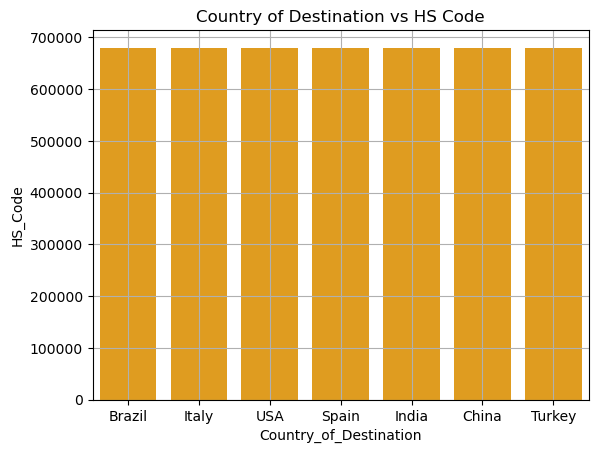

In [137]:
# plot the bar graph
sns.barplot(x='Country_of_Destination',y='HS_Code',data = df_trade_transaction_data,color='orange')
plt.title('Country of Destination vs HS Code')
plt.grid()
plt.show()

<Axes: xlabel='Country_of_Destination', ylabel='HS_Code'>

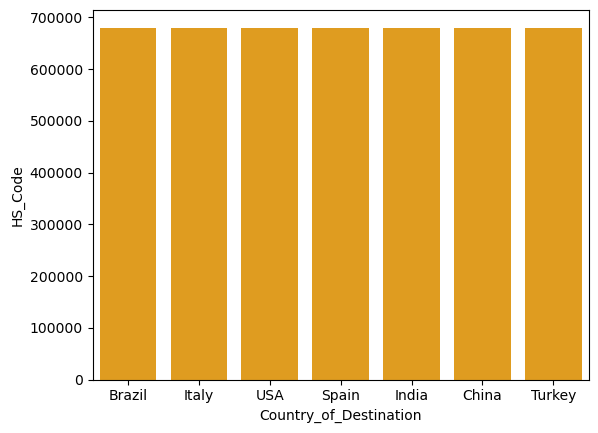

In [138]:
# plot the min bar graph
sns.barplot(x='Country_of_Destination',y='HS_Code',data = df_trade_transaction_data,color='orange',estimator=min)

<Axes: xlabel='Country_of_Destination', ylabel='HS_Code'>

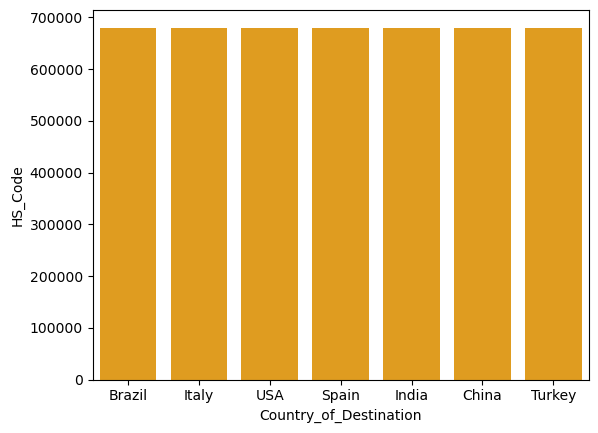

In [139]:
# plot the max bar graph
sns.barplot(x='Country_of_Destination',y='HS_Code',data = df_trade_transaction_data,color='orange',estimator=max)

#### INTERPRETATION
 - The distribution of HS Codes for importing countries varies.

### Mode_of_Transport, HS_Code

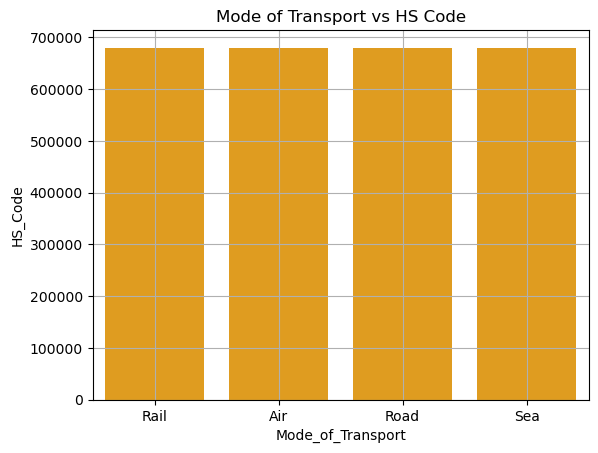

In [142]:
# plot the bar graph
sns.barplot(x='Mode_of_Transport',y='HS_Code',data = df_trade_transaction_data,color='orange')
plt.title('Mode of Transport vs HS Code')
plt.grid()
plt.show()

<Axes: xlabel='Mode_of_Transport', ylabel='HS_Code'>

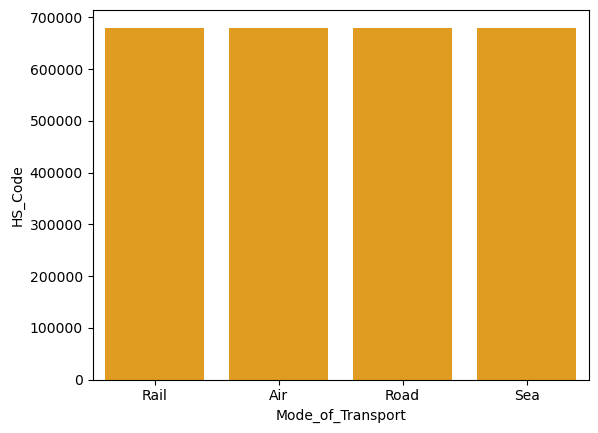

In [143]:
# plot the min bar graph
sns.barplot(x='Mode_of_Transport',y='HS_Code',data = df_trade_transaction_data,color='orange',estimator=min)

<Axes: xlabel='Mode_of_Transport', ylabel='HS_Code'>

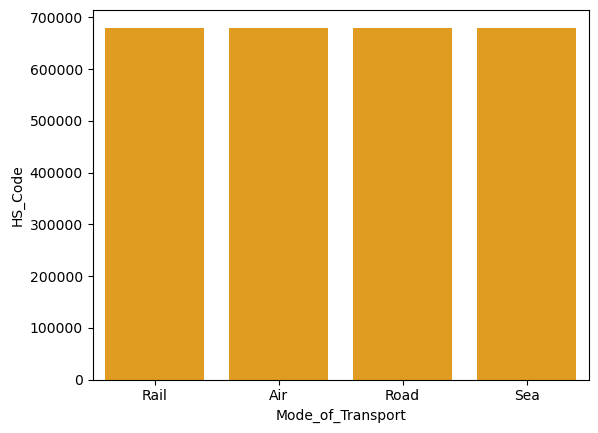

In [144]:
# plot the max bar graph
sns.barplot(x='Mode_of_Transport',y='HS_Code',data = df_trade_transaction_data,color='orange',estimator=max)

#### INTERPRETATION
 - Different transport modes are used for different product categories

### Incoterms, HS_Code

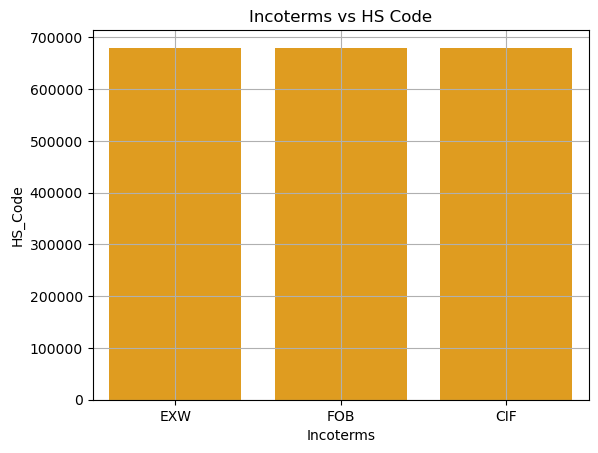

In [147]:
# plot the bar graph
sns.barplot(x='Incoterms',y='HS_Code',data = df_trade_transaction_data,color='orange')
plt.title('Incoterms vs HS Code')
plt.grid()
plt.show()

<Axes: xlabel='Incoterms', ylabel='HS_Code'>

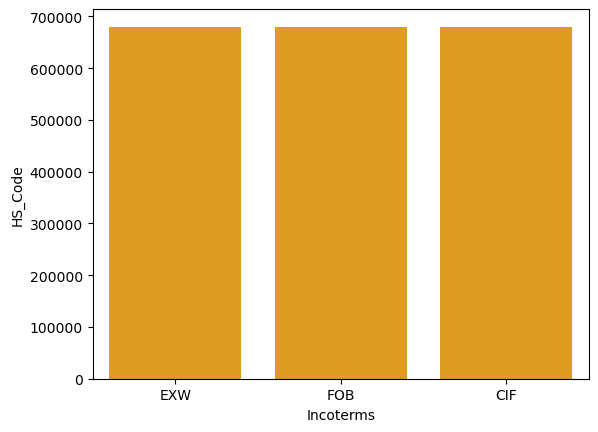

In [148]:
# plot the min bar graph
sns.barplot(x='Incoterms',y='HS_Code',data = df_trade_transaction_data,color='orange',estimator=min)

<Axes: xlabel='Incoterms', ylabel='HS_Code'>

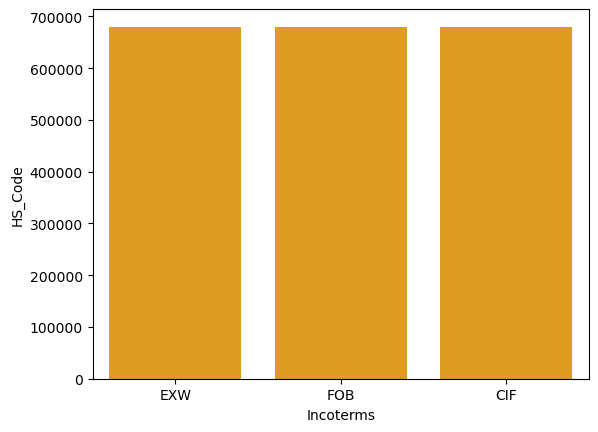

In [149]:
# plot the max bar graph
sns.barplot(x='Incoterms',y='HS_Code',data = df_trade_transaction_data,color='orange',estimator=max)

#### INTERPRETATION
 - Some Incoterms (like CIF, FOB) are used for specific HS Codes
 - Different trade terms are applied based on product type

### Transaction_ID, Quantity

#### INTERPRETATION
 - Values for transaction_ID are unique in each row so we do not plot the graph

### Trade_Type, Quantity

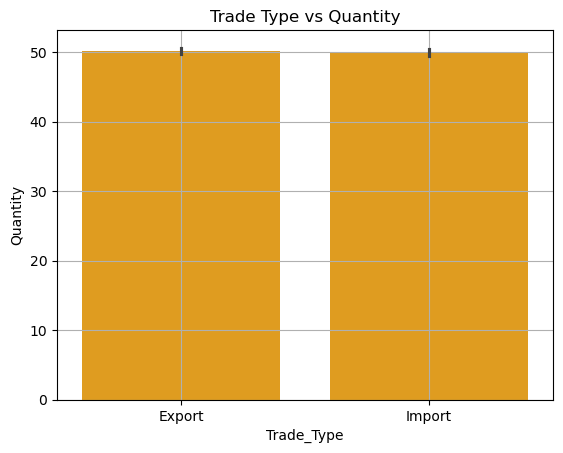

In [154]:
# plot the bar graph
sns.barplot(x='Trade_Type',y='Quantity',data = df_trade_transaction_data,color='orange')
plt.title('Trade Type vs Quantity')
plt.grid()
plt.show()

<Axes: xlabel='Trade_Type', ylabel='Quantity'>

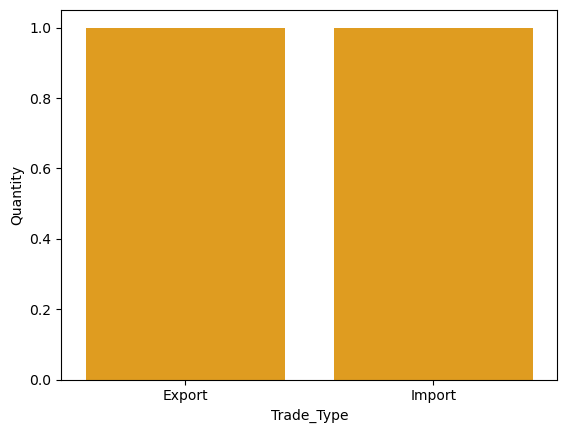

In [155]:
# plot the min bar graph
sns.barplot(x='Trade_Type',y='Quantity',data = df_trade_transaction_data,color='orange',estimator=min)

<Axes: xlabel='Trade_Type', ylabel='Quantity'>

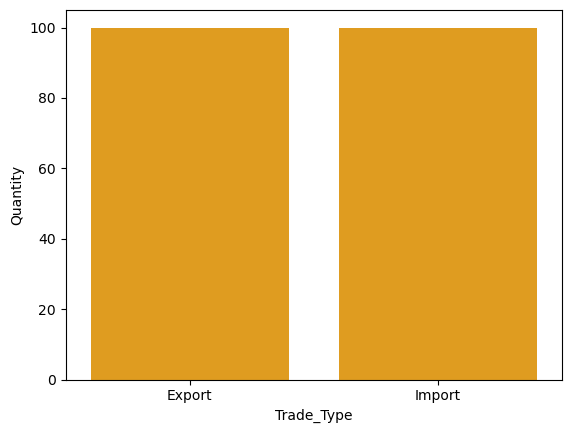

In [156]:
# plot the max bar graph
sns.barplot(x='Trade_Type',y='Quantity',data = df_trade_transaction_data,color='orange',estimator=max)

#### INTERPRETATION
 - Exports and imports show varied quantity distributions

### Product_Name, Quantity

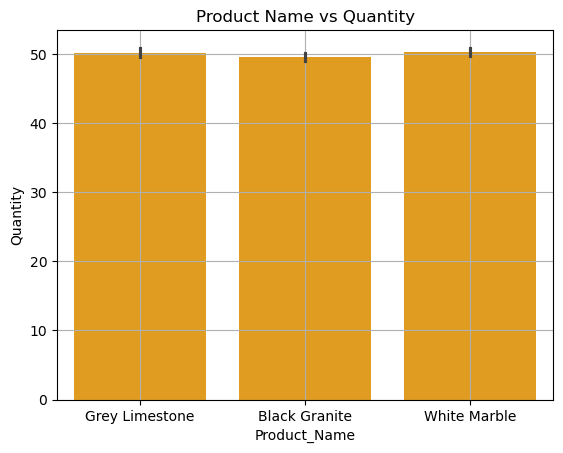

In [159]:
# plot the bar graph
sns.barplot(x='Product_Name',y='Quantity',data = df_trade_transaction_data,color='orange')
plt.title('Product Name vs Quantity')
plt.grid()
plt.show()

<Axes: xlabel='Product_Name', ylabel='Quantity'>

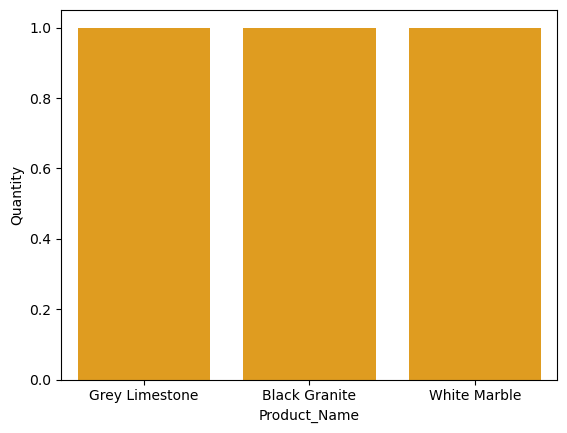

In [160]:
# plot the min bar graph
sns.barplot(x='Product_Name',y='Quantity',data = df_trade_transaction_data,color='orange',estimator=min)


<Axes: xlabel='Product_Name', ylabel='Quantity'>

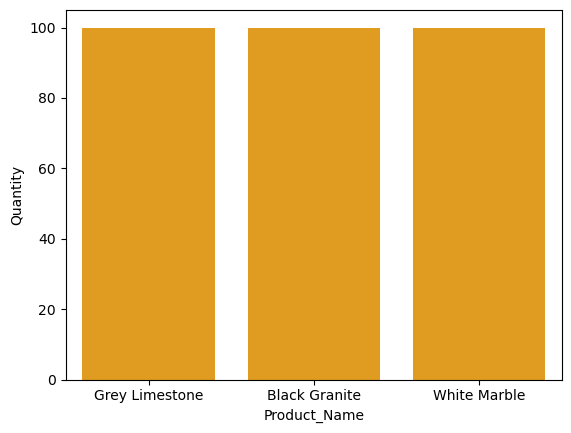

In [161]:
# plot the max bar graph
sns.barplot(x='Product_Name',y='Quantity',data = df_trade_transaction_data,color='orange',estimator=max)

#### INTERPRETATION
 - Certain products are traded in higher quantities than others

### Country_of_Origin, Quantity

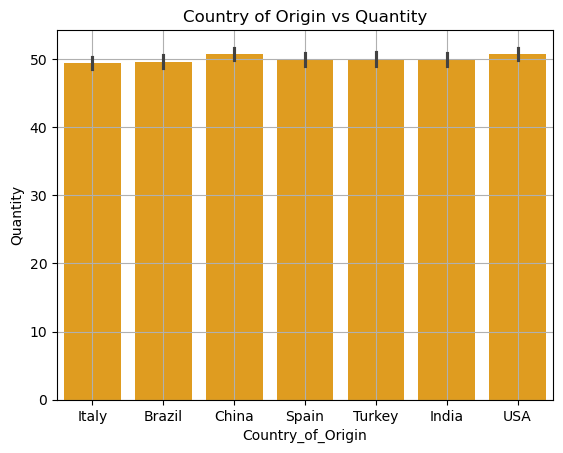

In [164]:
# plot the bar graph
sns.barplot(x='Country_of_Origin',y='Quantity',data = df_trade_transaction_data,color='orange')
plt.title('Country of Origin vs Quantity')
plt.grid()
plt.show()

<Axes: xlabel='Country_of_Origin', ylabel='Quantity'>

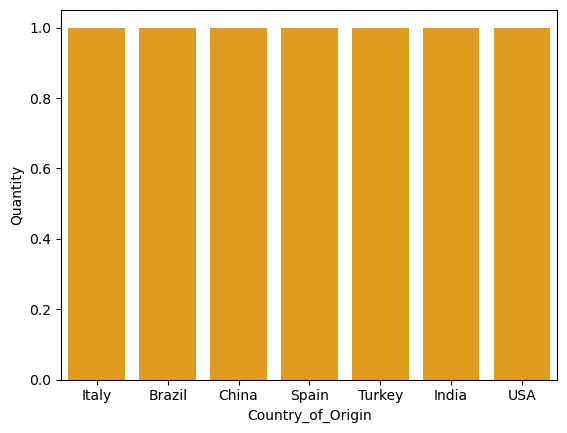

In [165]:
# plot the min bar graph
sns.barplot(x='Country_of_Origin',y='Quantity',data = df_trade_transaction_data,color='orange',estimator=min)

<Axes: xlabel='Country_of_Origin', ylabel='Quantity'>

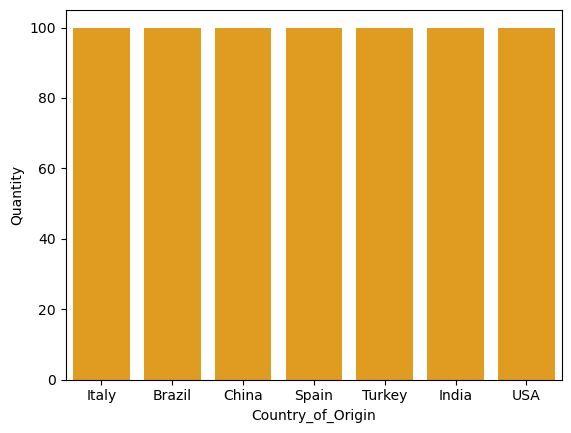

In [166]:
# plot the max bar graph
sns.barplot(x='Country_of_Origin',y='Quantity',data = df_trade_transaction_data,color='orange',estimator=max)

#### INTERPRETATION
 - Countries with higher quantities are major producers/exporters

### Country_of_Destination, Quantity

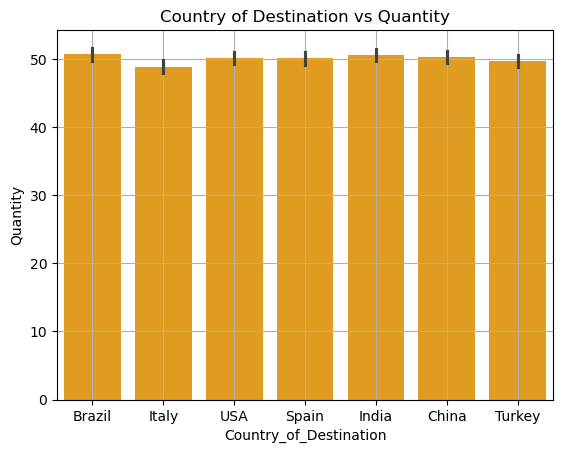

In [169]:
# plot the bar graph
sns.barplot(x='Country_of_Destination',y='Quantity',data = df_trade_transaction_data,color='orange')
plt.title('Country of Destination vs Quantity')
plt.grid()
plt.show()

<Axes: xlabel='Country_of_Destination', ylabel='Quantity'>

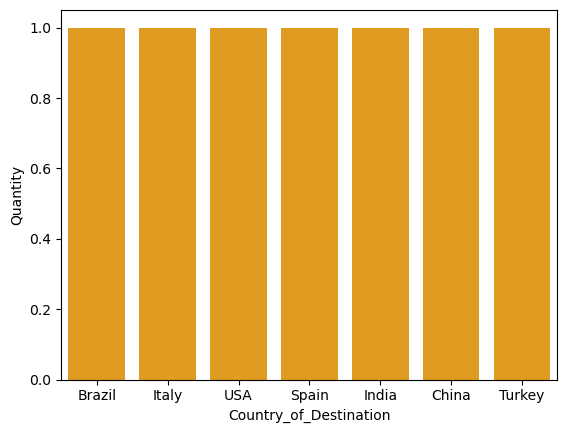

In [170]:
# plot the min bar graph
sns.barplot(x='Country_of_Destination',y='Quantity',data = df_trade_transaction_data,color='orange',estimator=min)

<Axes: xlabel='Country_of_Destination', ylabel='Quantity'>

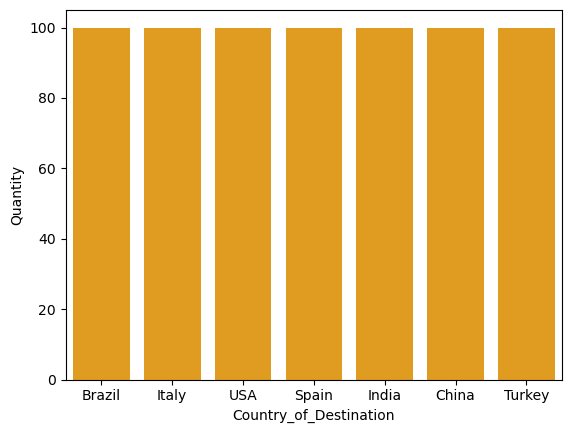

In [171]:
# plot the max bar graph
sns.barplot(x='Country_of_Destination',y='Quantity',data = df_trade_transaction_data,color='orange',estimator=max)

#### INTERPRETATION
 - Some countries import in high quantities, others in smaller amounts

### Mode_of_Transport, Quantity

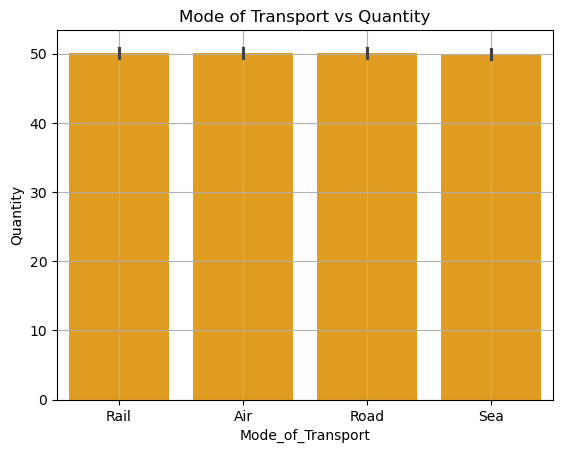

In [174]:
# plot the bar graph
sns.barplot(x='Mode_of_Transport',y='Quantity',data = df_trade_transaction_data,color='orange')
plt.title('Mode of Transport vs Quantity')
plt.grid()
plt.show()

<Axes: xlabel='Mode_of_Transport', ylabel='Quantity'>

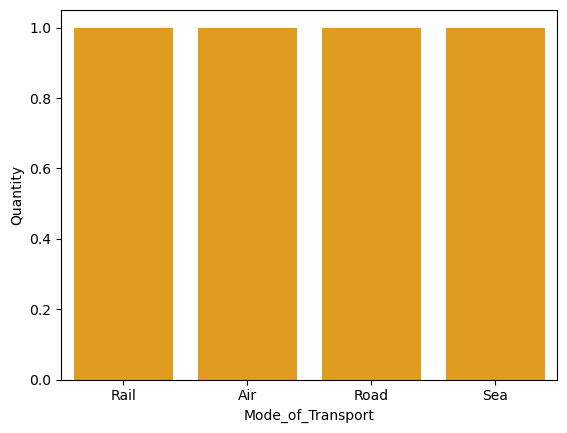

In [175]:
# plot the min bar graph
sns.barplot(x='Mode_of_Transport',y='Quantity',data = df_trade_transaction_data,color='orange',estimator=min)

<Axes: xlabel='Mode_of_Transport', ylabel='Quantity'>

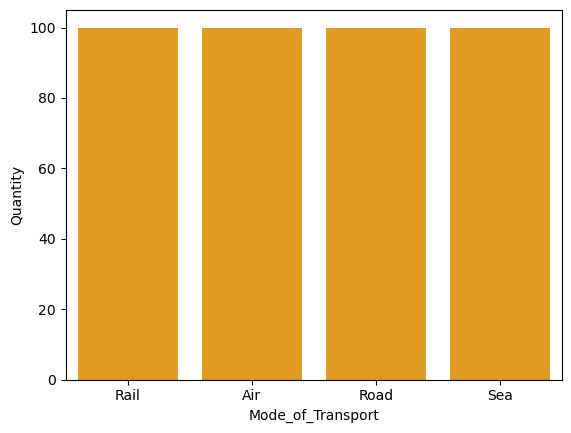

In [176]:
# plot the max bar graph
sns.barplot(x='Mode_of_Transport',y='Quantity',data = df_trade_transaction_data,color='orange',estimator=max)

#### INTERPRETATION
 - Sea transport is used for bulk goods
 - Air transport handles smaller but valuable products

### Incoterms, Quantity

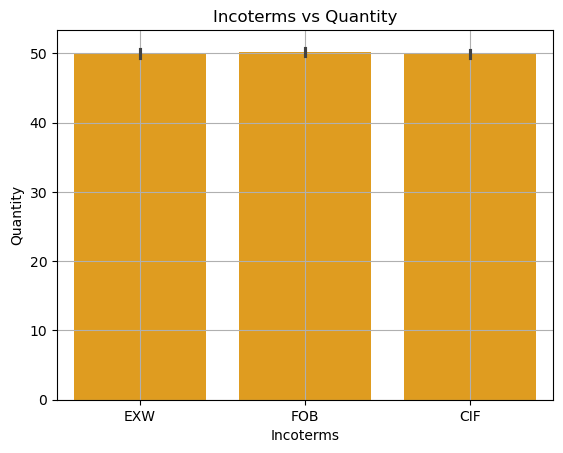

In [179]:
# plot the bar graph
sns.barplot(x='Incoterms',y='Quantity',data = df_trade_transaction_data,color='orange')
plt.title('Incoterms vs Quantity')
plt.grid()
plt.show()

<Axes: xlabel='Incoterms', ylabel='Quantity'>

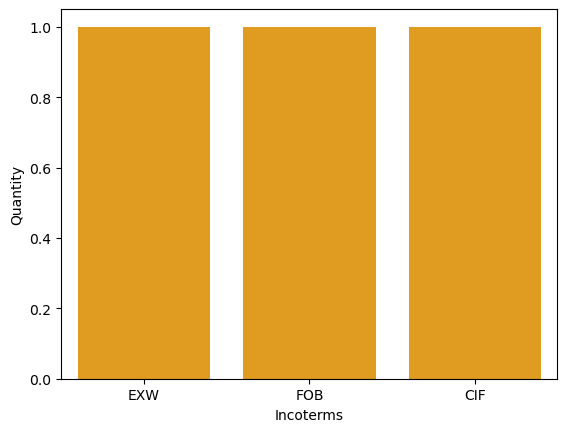

In [180]:
# plot the min bar graph
sns.barplot(x='Incoterms',y='Quantity',data = df_trade_transaction_data,color='orange',estimator=min)

<Axes: xlabel='Incoterms', ylabel='Quantity'>

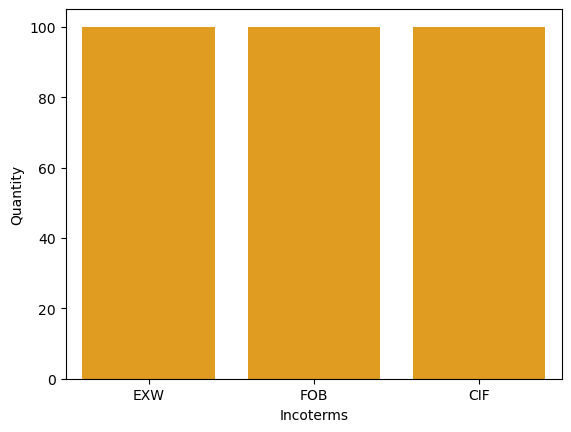

In [181]:
# plot the max bar graph
sns.barplot(x='Incoterms',y='Quantity',data = df_trade_transaction_data,color='orange',estimator=max)

#### INTERPRETATION
 - Different trade terms (like CIF, FOB) are associated with different product sizes

### Transaction_ID, Trade_Value

#### INTERPRETATION
 - Values for transaction_ID are unique in each row so we do not plot the graph

### Trade_Type, Trade_Value

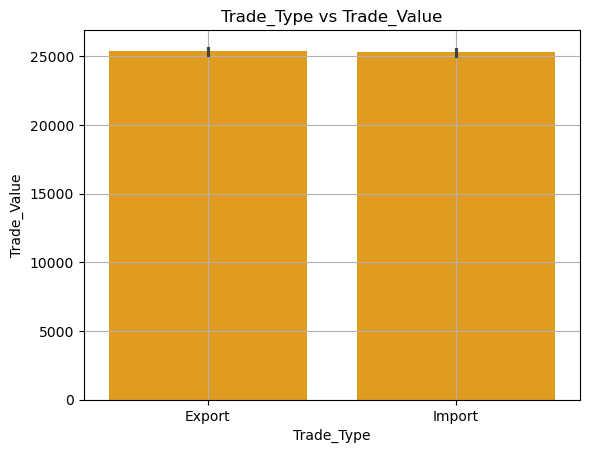

In [186]:
# plot the bar graph
sns.barplot(x='Trade_Type',y='Trade_Value',data = df_trade_transaction_data,color='orange')
plt.title('Trade_Type vs Trade_Value')
plt.grid()
plt.show()

<Axes: xlabel='Trade_Type', ylabel='Trade_Value'>

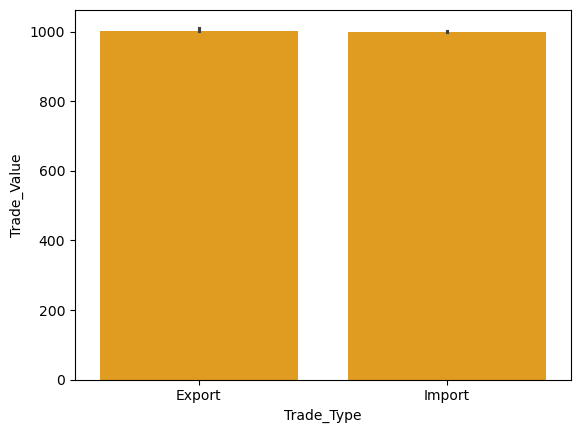

In [187]:
# plot the min bar graph
sns.barplot(x='Trade_Type',y='Trade_Value',data = df_trade_transaction_data,color='orange',estimator=min)

<Axes: xlabel='Trade_Type', ylabel='Trade_Value'>

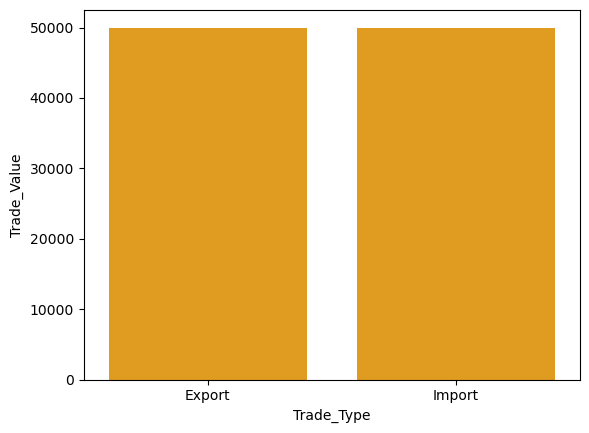

In [188]:
# plot the max bar graph
sns.barplot(x='Trade_Type',y='Trade_Value',data = df_trade_transaction_data,color='orange',estimator=max)

#### INTERPRETATION
 - Exports and imports show different trade value distributions

### Product_Name, Trade_Value

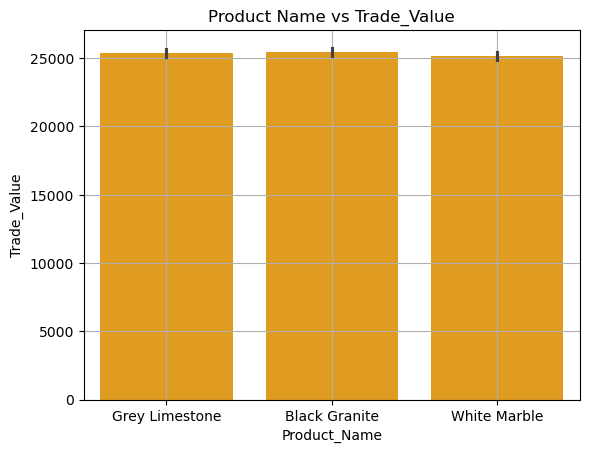

In [191]:
# plot the bar graph
sns.barplot(x='Product_Name',y='Trade_Value',data = df_trade_transaction_data,color='orange')
plt.title('Product Name vs Trade_Value')
plt.grid()
plt.show()

<Axes: xlabel='Product_Name', ylabel='Trade_Value'>

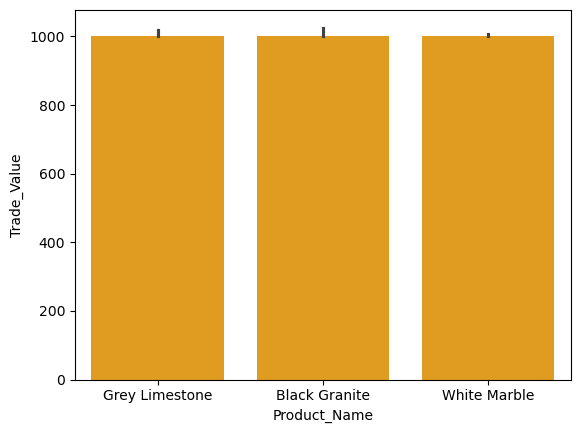

In [192]:
# plot the min bar graph
sns.barplot(x='Product_Name',y='Trade_Value',data = df_trade_transaction_data,color='orange',estimator=min)

<Axes: xlabel='Product_Name', ylabel='Trade_Value'>

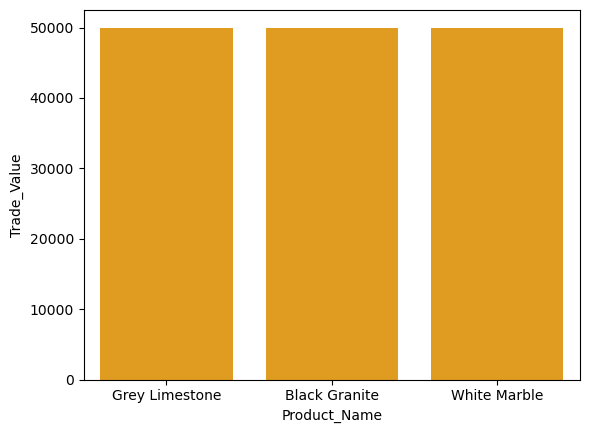

In [193]:
# plot the max bar graph
sns.barplot(x='Product_Name',y='Trade_Value',data = df_trade_transaction_data,color='orange',estimator=max)

#### INTERPRETATION
 - Some products have significantly higher trade values

### Country_of_Origin, Trade_Value

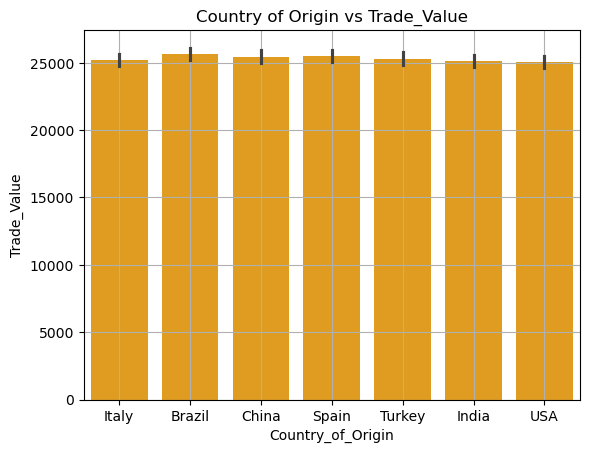

In [196]:
# plot the bar graph
sns.barplot(x='Country_of_Origin',y='Trade_Value',data = df_trade_transaction_data,color='orange')
plt.title('Country of Origin vs Trade_Value')
plt.grid()
plt.show()

<Axes: xlabel='Country_of_Origin', ylabel='Trade_Value'>

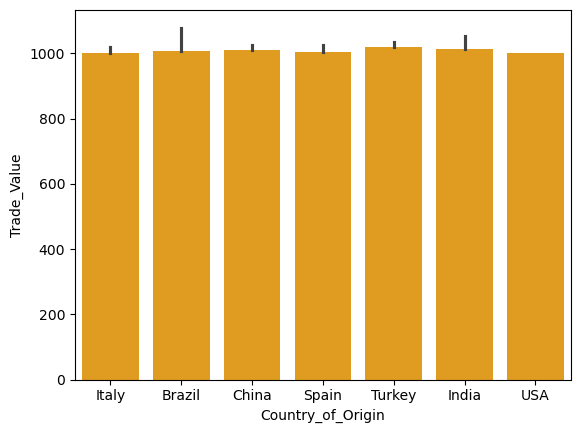

In [197]:
# plot the min bar graph
sns.barplot(x='Country_of_Origin',y='Trade_Value',data = df_trade_transaction_data,color='orange',estimator=min)

<Axes: xlabel='Country_of_Origin', ylabel='Trade_Value'>

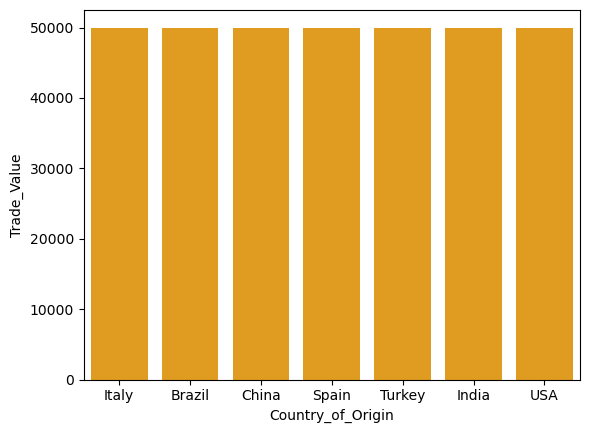

In [198]:
# plot the max bar graph
sns.barplot(x='Country_of_Origin',y='Trade_Value',data = df_trade_transaction_data,color='orange',estimator=max)

#### INTERPRETATION
 - Some countries contribute to higher trade values than others

### Country_of_Destination, Trade_Value

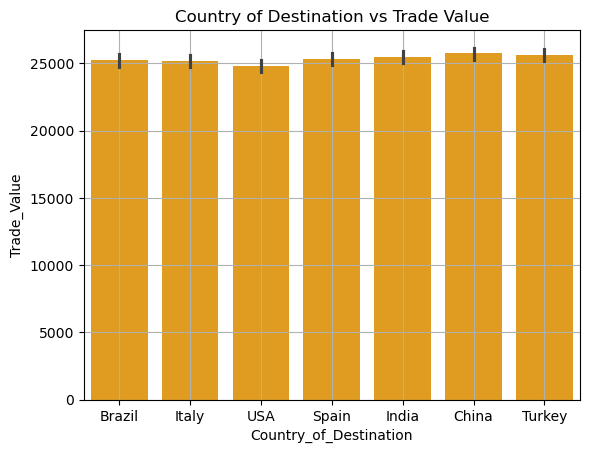

In [201]:
# plot the bar graph
sns.barplot(x='Country_of_Destination',y='Trade_Value',data = df_trade_transaction_data,color='orange')
plt.title('Country of Destination vs Trade Value')
plt.grid()
plt.show()

<Axes: xlabel='Country_of_Destination', ylabel='Trade_Value'>

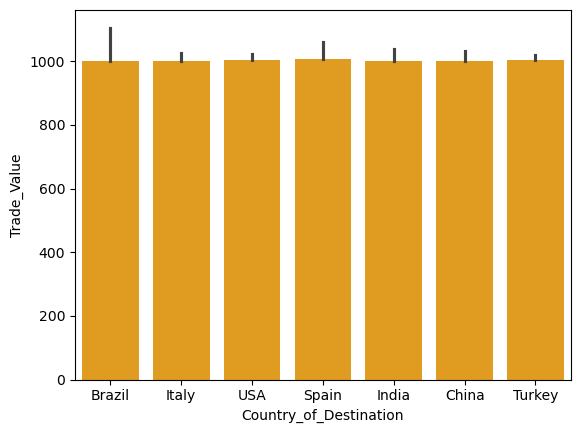

In [202]:
# plot the min bar graph
sns.barplot(x='Country_of_Destination',y='Trade_Value',data = df_trade_transaction_data,color='orange',estimator=min)

<Axes: xlabel='Country_of_Destination', ylabel='Trade_Value'>

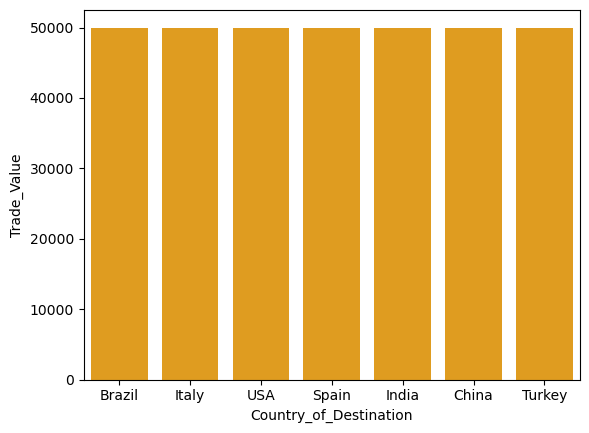

In [203]:
# plot the max bar graph
sns.barplot(x='Country_of_Destination',y='Trade_Value',data = df_trade_transaction_data,color='orange',estimator=max)

#### INTERPRETATION
 - Some countries are major importers of high-value goods

### Mode_of_Transport, Trade_Value

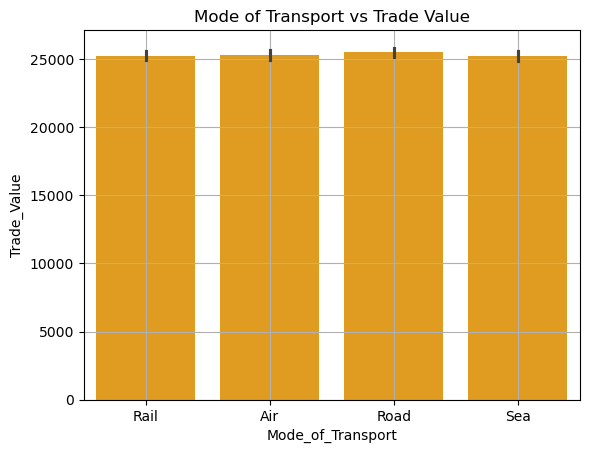

In [206]:
# plot the bar graph
sns.barplot(x='Mode_of_Transport',y='Trade_Value',data = df_trade_transaction_data,color='orange')
plt.title('Mode of Transport vs Trade Value')
plt.grid()
plt.show()

<Axes: xlabel='Mode_of_Transport', ylabel='Trade_Value'>

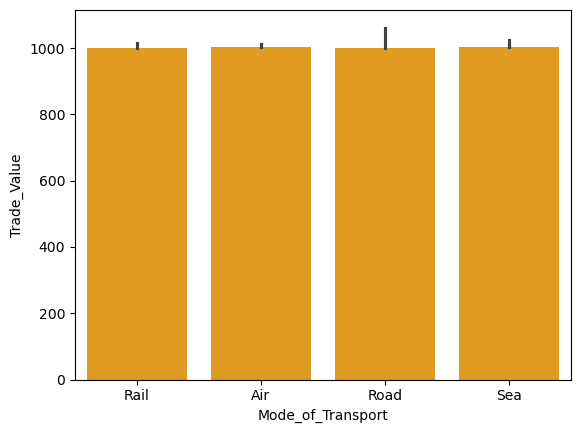

In [207]:
# plot the min bar graph
sns.barplot(x='Mode_of_Transport',y='Trade_Value',data = df_trade_transaction_data,color='orange',estimator=min)

<Axes: xlabel='Mode_of_Transport', ylabel='Trade_Value'>

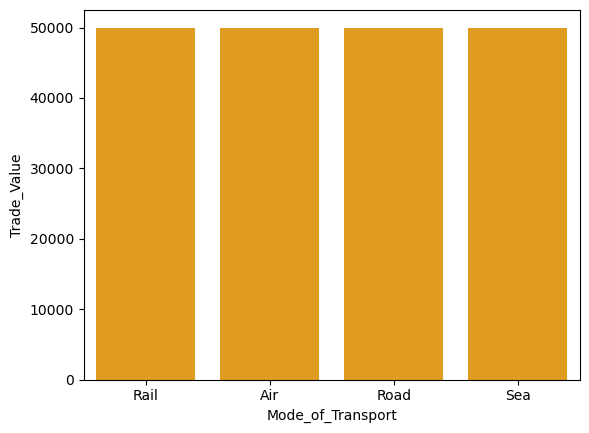

In [208]:
# plot the max bar graph
sns.barplot(x='Mode_of_Transport',y='Trade_Value',data = df_trade_transaction_data,color='orange',estimator=max)

#### INTERPRETATION
 - Some transport modes carry goods with higher trade values
 - Air transport is used for high-value goods
 - Sea transport handles lower-value bulk goods

### Incoterms, Trade_Value

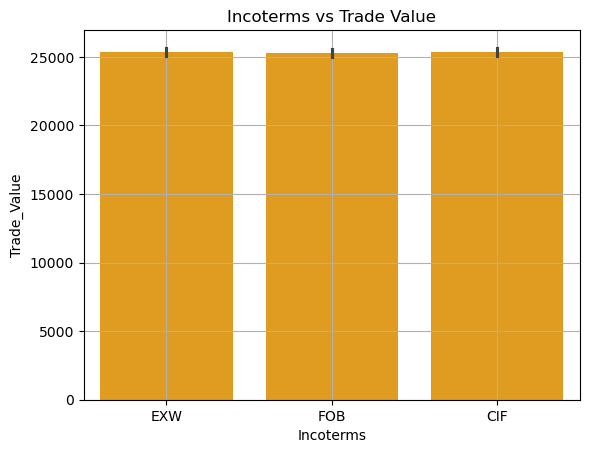

In [211]:
# plot the bar graph
sns.barplot(x='Incoterms',y='Trade_Value',data = df_trade_transaction_data,color='orange')
plt.title('Incoterms vs Trade Value')
plt.grid()
plt.show()

<Axes: xlabel='Incoterms', ylabel='Trade_Value'>

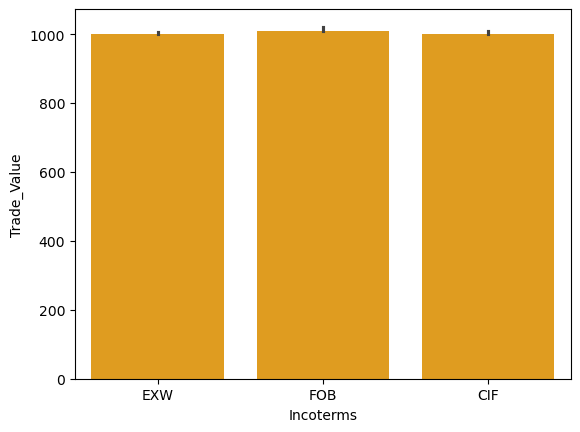

In [212]:
# plot the min bar graph
sns.barplot(x='Incoterms',y='Trade_Value',data = df_trade_transaction_data,color='orange',estimator=min)

<Axes: xlabel='Incoterms', ylabel='Trade_Value'>

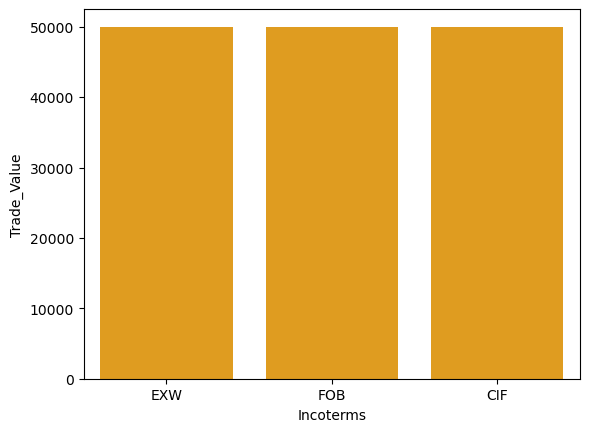

In [213]:
# plot the max bar graph
sns.barplot(x='Incoterms',y='Trade_Value',data = df_trade_transaction_data,color='orange',estimator=max)

#### INTERPRETATION
 - Certain Incoterms are linked with high-value transactions

## SUMMARY 
 - GENERAL INSIGHTS : 
    - Exports (12,725 transactions) slightly exceed Imports (12,275 transactions), but the difference is minimal.    
 - PRODUCT INSIGHTS :
    - The most traded products are White Marble (8,423 transactions), Grey Limestone (8,357), and Black Granite (8,220).  
 - COUNTRY INSIGHTS :
    - 7 countries are involved in both imports and exports.
    - Top Export Destinations: USA, China, Brazil, Italy, and Spain.
    - Top Import Sources: China, Spain, Turkey, Italy, and Brazil.
    - China is both a top importer and exporter.
 - MODE OF TRANSPORT INSIGHTS :
    - Trade occurs via Sea, Rail, Air and Road Ways.
    - Sea (6,258), Rail (6,256), Air (6,247), and Road (6,239) are almost equally used.  
 - INCOTERMS INSIGHTS
    - Incoterms like FOB (Free on Board), CIF (Cost, Insurance, Freight), and EXW (Ex Works) indicate how trade responsibilities and risks are shared.
 - OUTLIERS ANALYSIS
    - There are no outliers in the HS_Code and Quantity columns.
    - In the Trade_Value column, the large difference between the mean (25331.19) and median (25238.58) suggests the presence of outliers.
    - To handle this, outliers were detected using the IQR method and replaced with the mean, ensuring a more balanced dataset for analysis.